# Práctica 1

La siguiente práctica está hecha sobre un Notebook de Kaggle, llamado *Formula 1 Pit Stops Analysis*, y su dataset proviene de *Formula 1 World Championship (1950 - 2024)*, también disponible en Kaggle.

el objetivo es el explorar los datos a través de distintas gráficas, sin embargo el dataset es bastante extenso, por lo que primero se creará un conjunto de datos más pequeño para poder validar la información mostrada de forma más sencilla.

El subconjunto que se tomará es sobre los tiempos en pits de los pilotos *Sergio Pérez* y *Max Verstappen* durante el año 2021, año en el cual ambos pilotos pertenecían al equipo *Red Bull*.

Dicho lo anterior, lo primero que hacemos es importar las librerías que utilizaremos en la exploración de datos:

In [1]:

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Importamos también los datos con los que vamos a trabajar, los cuales se encuentran en una carpeta local:

In [2]:

fpath = 'C:/Users/Black/Documents/Jupyter/Práctica 1/Dataset/'

races = pd.read_csv(f'{fpath}races.csv', index_col=0, na_values=r'\N')
circuits = pd.read_csv(f'{fpath}circuits.csv', index_col=0, na_values=r'\N')
constructors = pd.read_csv(f'{fpath}constructors.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv(f'{fpath}drivers.csv', index_col=0, na_values=r'\N')
pitStops = pd.read_csv(f'{fpath}pit_stops.csv', index_col=0, na_values=r'\N')
results = pd.read_csv(f'{fpath}results.csv', index_col=0, na_values=r'\N')


Cambiamos el nombre de algunas variables y transformamos algunos de los datos importados:

In [3]:

races = races.rename(columns={'name':'raceName', 'url':'raceUrl'})
                              
circuits = circuits.rename(columns={'name':'circuitName', 'location':'circuitLocation', 'country':'circuitCountry', 'url':'circuitUrl'})

constructors = constructors.rename(columns={'name':'constructorName', 'nationality':'constructorNationality', 'url':'constructorUrl'})

drivers = drivers.rename(columns={'nationality':'driverNationality', 'url':'driverUrl'})
drivers['driverName'] = drivers['forename'] + ' ' + drivers['surname']

pitStops = pitStops.rename(columns = {'time':'PitTime'})
pitStops['seconds'] = pitStops['milliseconds'] / 1000

results['seconds'] = results['milliseconds'] / 1000

Antes de comenzar a explorar, vamos a delimitar la información para trabajar con un subconjunto pequeño de datos. Para esto es necesario crear 3 tablas auxiliares, que son:
*newResults*, 
*newPitStops* y 
raceResults

In [4]:

newResults = pd.merge(results, races, left_on = 'raceId', right_index = True, how = 'left')
newResults = pd.merge(newResults, circuits, left_on = 'circuitId', right_index = True, how = 'left')
newResults = pd.merge(newResults, constructors, left_on = 'constructorId', right_index = True, how = 'left')
newResults = pd.merge(newResults, drivers, left_on = 'driverId', right_index = True, how = 'left')

newPitStops = pd.merge(pitStops, races, left_on = 'raceId', right_index = True, how = 'left')
newPitStops = pd.merge(newPitStops, circuits, left_on = 'circuitId', right_index = True, how = 'left')
newPitStops = pd.merge(newPitStops, newResults[['raceId', 'driverId', 'driverName', 'constructorId', 'constructorName']], left_on = ['raceId', 'driverId'], right_on = ['raceId', 'driverId'])

raceResults = pd.merge(newResults, newPitStops.groupby(by = ['raceId', 'raceName', 'constructorName', 'driverId', 'driverName']).sum(), left_on = ['raceId', 'driverId'], right_on = ['raceId', 'driverId'], how = 'left')
raceResults['pitPercentage'] = raceResults['milliseconds_y'] / raceResults['milliseconds_x'] * 100


Por último, creamos la tabla *ResultadosRB* sobre la que vamos a trabajar. Esta contendrá los tiempos en pits de cada piloto de la escudería Red Bull en 2021:


In [17]:

Resultados = raceResults[["raceId", "driverName", "constructorName", "raceName", "date_x", "seconds_y", "pitPercentage"]]
Resultados['date_x'] = Resultados['date_x'].str.split('-').str[0] + Resultados['date_x'].str.split('-').str[1] + Resultados['date_x'].str.split('-').str[2]
Resultados['date_x'] = Resultados['date_x'].astype(str).astype(int)
Resultados['seconds_y'] = Resultados['seconds_y'].fillna(0)
Resultados['pitPercentage'] = Resultados['pitPercentage'].fillna(0)

ResultadosRB = Resultados.loc[(Resultados['constructorName'] == 'Red Bull') & (Resultados['date_x'] > 20210000) & (Resultados['date_x'] < 20220000)]
ResultadosRB

C:\Users\Black\AppData\Local\Temp\ipykernel_11360\733332339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resultados['date_x'] = Resultados['date_x'].str.split('-').str[0] + Resultados['date_x'].str.split('-').str[1] + Resultados['date_x'].str.split('-').str[2]
C:\Users\Black\AppData\Local\Temp\ipykernel_11360\733332339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Resultados['date_x'] = Resultados['date_x'].astype(str).astype(int)
C:\Users\Black\AppData\Local\Temp\ipykernel_11360\733332339.py:4

,raceId,driverName,constructorName,raceName,date_x,seconds_y,pitPercentage
24961,1052,Max Verstappen,Red Bull,Bahrain Grand Prix,20210328,48.615,0.879967
24964,1052,Sergio Pérez,Red Bull,Bahrain Grand Prix,20210328,72.289,1.296444
24980,1053,Max Verstappen,Red Bull,Emilia Romagna Grand Prix,20210418,1651.170,22.450853
24990,1053,Sergio Pérez,Red Bull,Emilia Romagna Grand Prix,20210418,1625.766,21.905430
25001,1054,Max Verstappen,Red Bull,Portuguese Grand Prix,20210502,97.884,1.717092
25003,1054,Sergio Pérez,Red Bull,Portuguese Grand Prix,20210502,70.597,1.236125
25021,1055,Max Verstappen,Red Bull,Spanish Grand Prix,20210509,45.157,0.805868
25024,1055,Sergio Pérez,Red Bull,Spanish Grand Prix,20210509,43.727,0.773744
25041,1056,Max Verstappen,Red Bull,Monaco Grand Prix,20210523,23.746,0.399978
25043,1056,Sergio Pérez,Red Bull,Monaco Grand Prix,20210523,24.548,0.412065


Así, usaremos la información anterior para hacer distintas gráficas:

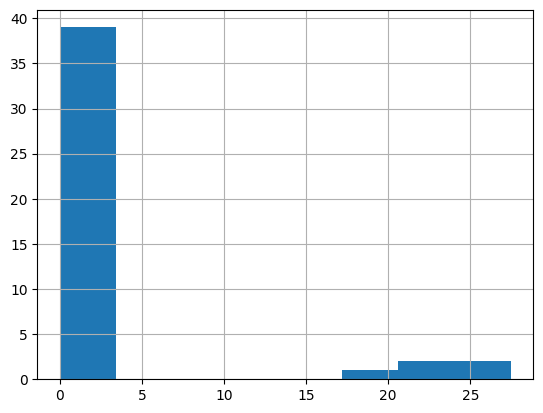

In [6]:
histograma = ResultadosRB['pitPercentage'].hist(bins = 8)

**Observaciones**: este histograma nos muestra como se encuentra distribuído el *pitPercentage*, el cual es un valor que nos dice el porcentaje de la carrera que el piloto pasó dentro de pits. De esto vemos que en la gran mayoría de carreras, este porcentaje está por debajo del 5%. Esto es lo esperado, ya que en una carrera, como máximo, se entra hasta 4 veces a pits, lo cual equivale alrededor de 5 minutos de tiempo y las carreras tienen una duración aproximada de 2 horas. El resto de valores pueden interpretarse como carreras por retraso, ya sea por algún choque o lluvia, o también como abandonos del piloto.

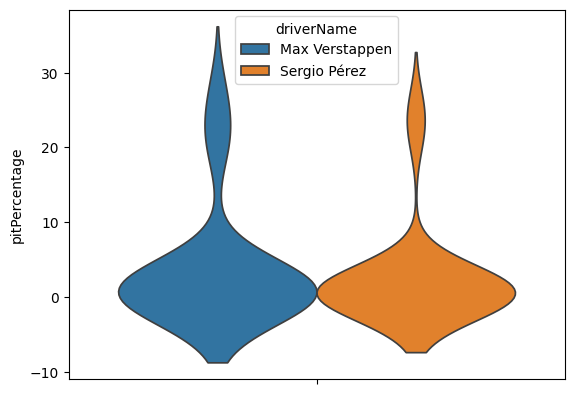

In [7]:
violin=sns.violinplot(data = ResultadosRB, y = "pitPercentage", hue = "driverName", inner = None)

**Observaciones**: la gráfica de violín nos brinda información un poco más detallada en comparación al histograma, ya que aquí tenemos una separación por pilotos. De esto podemos ver el comportamiento en pits de ambos pilotos es casi el mismo, lo cual tiene sentido ya que comparten a los mismos mecánicos y se encontraron bajo las mismas condiciones de carrera.

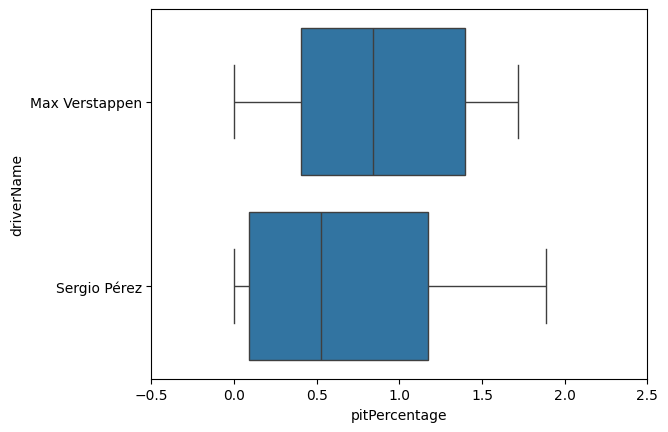

In [8]:
caja = sns.boxplot(data = ResultadosRB, x = "pitPercentage", y = "driverName").set(xlim=(-0.5, 2.5))

**Observaciones**: para el boxplot analizamos los tiempos de todos los años. Aquí nos muestra que *Sergio Pérez* cuenta con el tiempo más rápido, es consistentemente más rápido y su promedio es más bajo que el de su compañero de equipo, *Max Verstappen*, sin embargo también tiene el tiempo más lento del año.
 

<Axes: xlabel='date_x', ylabel='seconds_y'>

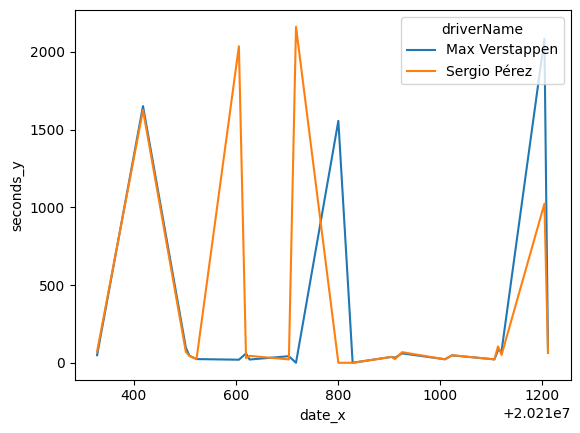

In [9]:
sns.lineplot(data = ResultadosRB, x = "date_x", y = "seconds_y", hue = "driverName", palette="tab10")

**Observaciones**: las series de tiempo que describen la variable del tiempo en pits nos ayudan a identificar cuándo es que hubo anomalías en lo que respecta a este tema. Para este caso, los datos están ordenados por fecha (de menor fecha a mayor fecha), y un pico nos puede decir que hubo un retraso en carrera, o bien que hubo un abandono. Si vemos que los dos pilotos tienen un tiempo alto es muy probable que sea un retraso en carrera, sin embargo se han dado casos en que dos pilotos de la misma escudería abandonan la carrera.

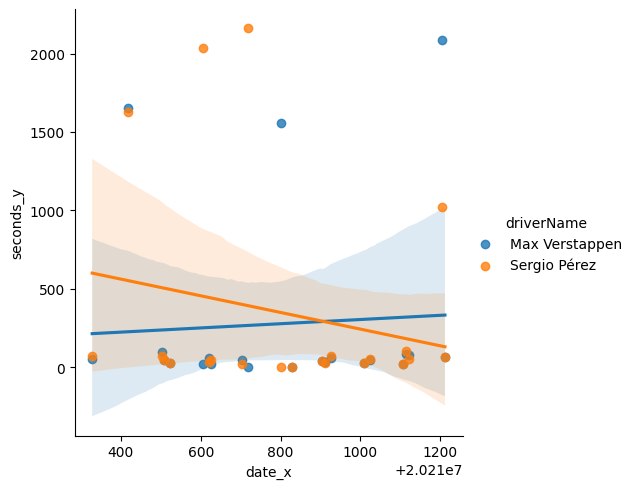

In [10]:
sns.lmplot(data = ResultadosRB, x = 'date_x', y = 'seconds_y', hue = 'driverName')

**Observaciones**: Ahora, la regresión lineal nos dice que el tiempo de *Sergio Pérez* fue mejorando notablemente conforme avanzó el campeonato, y esto es porque al inicio de temporada tuvo incidentes de carrera que requerían de reparar alerones delanteros o hacer ajustes más allá de un cambio de llantas. Esto hizo que los tiempos se elevaran considerablemente al inicio de la temporada, y por eso, con el paso del tiempo, la consistencia en carrera mejoró su tiempo considerablemente, mientras que con *Max Verstappen* fue lo contrario.